#Initial SetUp


In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%reload_ext rpy2.ipython

In [ ]:
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=318085 sha256=e0a31a8812a00e3ec87f1926316f315c5beb2d62e161cedbc17d59c8a247fca1
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [ ]:
%%R
customer_data=read.csv("/content/Mall_Customers.csv")

NotImplementedError: ignored

In [ ]:
%%R
str(customer_data)

NotImplementedError: ignored

In [ ]:
%%R
names(customer_data)

NotImplementedError: ignored

In [ ]:
%%R
head(customer_data)

  CustomerID Gender Age Annual.Income..k.. Spending.Score..1.100.
1          1   Male  19                 15                     39
2          2   Male  21                 15                     81
3          3 Female  20                 16                      6
4          4 Female  23                 16                     77
5          5 Female  31                 17                     40
6          6 Female  22                 17                     76


In [ ]:
%%R
summary(customer_data $ Age)
# $ is an extract operator.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 


In [ ]:
%%R
sd(customer_data$Age)


[1] 13.96901


In [ ]:
%%R
summary(customer_data$Annual.Income..k..)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 


In [ ]:
%%R
sd(customer_data$Annual.Income..k..)

[1] 26.26472


In [ ]:
%%R
summary(customer_data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 


In [ ]:
%%R
sd(customer_data$Spending.Score..1.100.)

[1] 25.82352


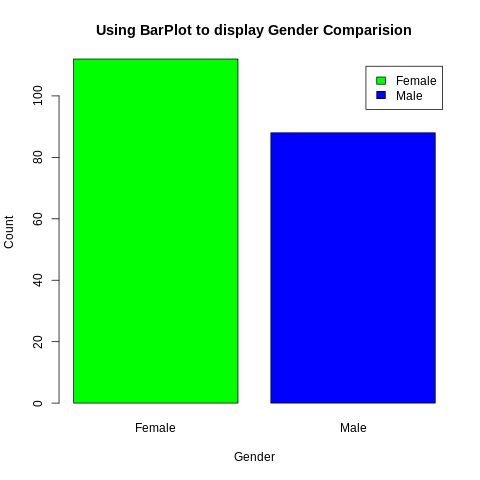

In [ ]:
%%R
a=table(customer_data$Gender)
barplot(a,main="Using BarPlot to display Gender Comparision",
       ylab="Count",
       xlab="Gender",
       col=c('green', 'blue'),
       legend=rownames(a))

In [ ]:
%%R
install.packages("plotrix")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpKHnMcY/downloaded_packages’



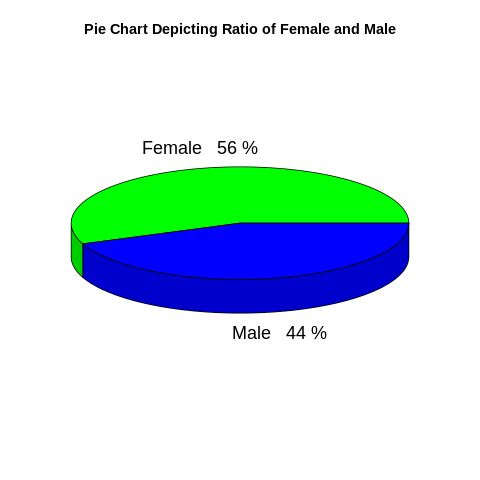

In [ ]:
%%R
pct=round(a/sum(a)*100)
lbs=paste(c("Female","Male")," ",pct,"%",sep=" ")
library(plotrix)
pie3D(a,labels=lbs,
   main="Pie Chart Depicting Ratio of Female and Male",
    col=c('green', 'blue'))


#VISUALIZATION

In [ ]:
%%R
summary(customer_data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 


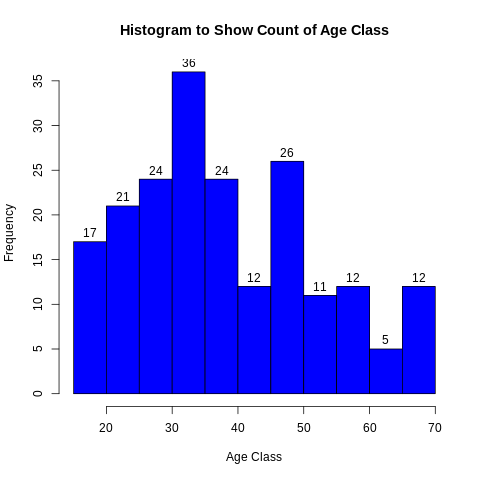

In [ ]:
%%R
hist(customer_data$Age,
    col="Blue",
    main="Histogram to Show Count of Age Class",
    xlab="Age Class",
    ylab="Frequency",
    labels=TRUE)

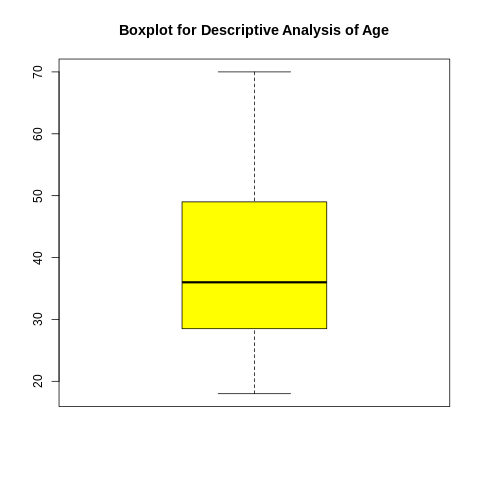

In [ ]:
%%R
boxplot(customer_data$Age,
       col="yellow",
       main="Boxplot for Descriptive Analysis of Age")

#ANALYSIS


In [ ]:
%%R
summary(customer_data$Annual.Income..k..)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 


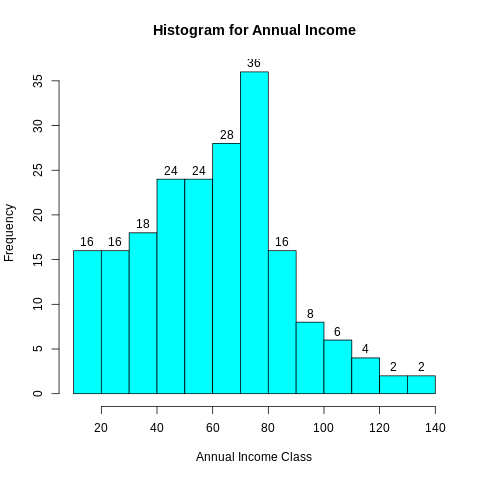

In [ ]:
%%R
hist(customer_data$Annual.Income..k..,
  col="cyan",
  main="Histogram for Annual Income",
  xlab="Annual Income Class",
  ylab="Frequency",
  labels=TRUE)

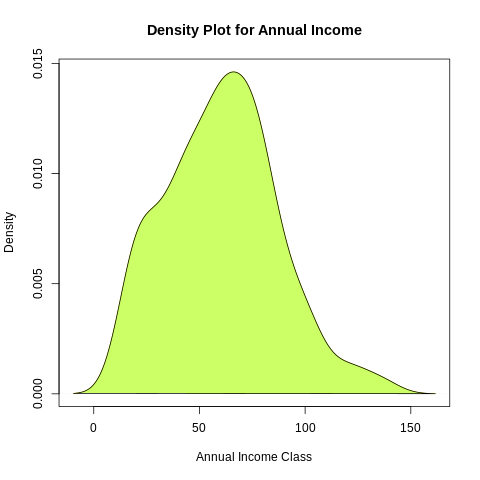

In [ ]:
%%R
plot(density(customer_data$Annual.Income..k..),
    col="yellow",
    main="Density Plot for Annual Income",
    xlab="Annual Income Class",
    ylab="Density")
polygon(density(customer_data$Annual.Income..k..),
        col="#ccff66")

In [ ]:
%%R
summary(customer_data$Spending.Score..1.100.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   34.75   50.00   50.20   73.00   99.00 


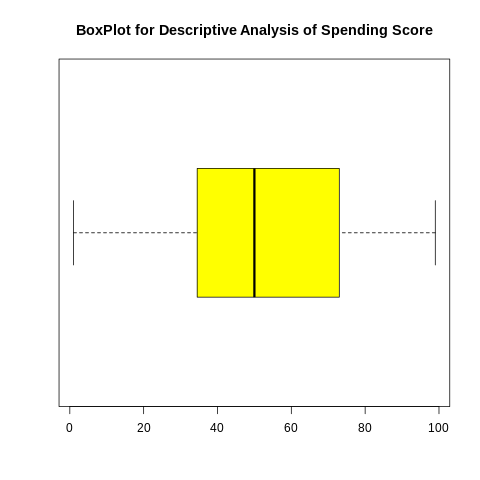

In [ ]:
%%R
boxplot(customer_data$Spending.Score..1.100.,
   horizontal=TRUE,
   col="YELLOW",
   main="BoxPlot for Descriptive Analysis of Spending Score")

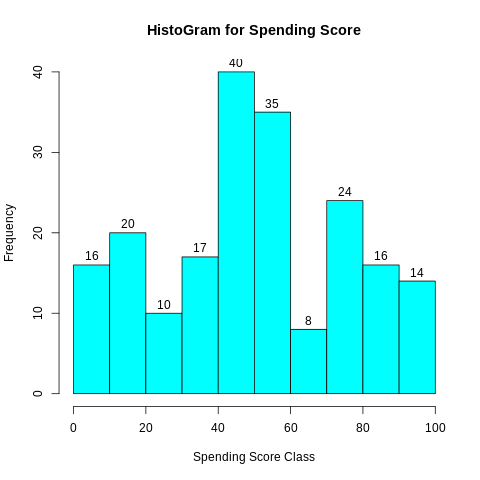

In [ ]:
%%R
hist(customer_data$Spending.Score..1.100.,
    main="HistoGram for Spending Score",
    xlab="Spending Score Class",
    ylab="Frequency",
    col="cyan",
    labels=TRUE)


#K-Means Silhoutte


In [ ]:
%%R
install.packages("purrr")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpcMCtRc/downloaded_packages’



**ELBOW** **METHOD**

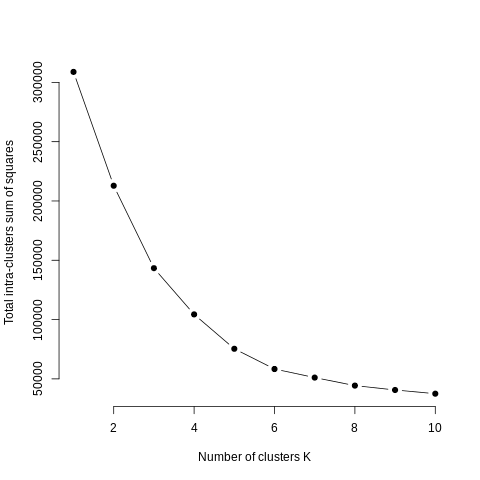

In [ ]:
%%R
library(purrr)
set.seed(123)
# function to calculate total intra-cluster sum of square
iss <- function(k) {
  kmeans(customer_data[,3:5],k,iter.max=100,nstart=100,algorithm="Lloyd" )$tot.withinss
}
k.values <- 1:10
iss_values <- map_dbl(k.values, iss)
plot(k.values, iss_values,
    type="b", pch = 19, frame = FALSE,
    xlab="Number of clusters K",
    ylab="Total intra-clusters sum of squares")

**SILHOUETTE METHOD**

In [ ]:
%%R
install.packages("gridExtra")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpcMCtRc/downloaded_packages’



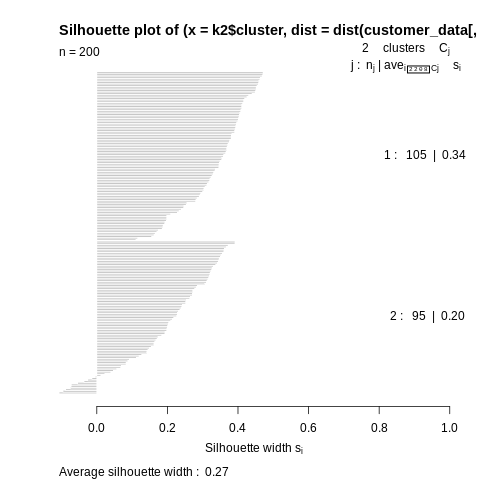

In [ ]:
%%R
library(cluster)
library(gridExtra)
library(grid)

k2<- kmeans(customer_data[,3:4],2,iter.max=100,nstart=50,algorithm="Lloyd")
s2<- plot(silhouette(k2 $ cluster,dist(customer_data[,3:5],"euclidean")))

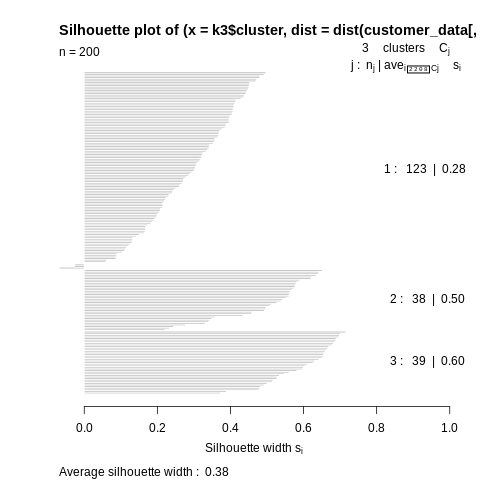

In [ ]:
%%R
k3<-kmeans(customer_data[,3:5],3,iter.max=100,nstart=50,algorithm="Lloyd")
s3<-plot(silhouette(k3$cluster,dist(customer_data[,3:5],"euclidean")))

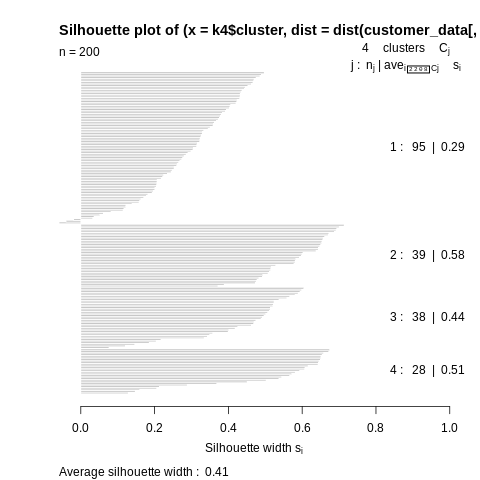

In [ ]:
%%R
k4<-kmeans(customer_data[,3:5],4,iter.max=100,nstart=50,algorithm="Lloyd")
s4<-plot(silhouette(k4$cluster,dist(customer_data[,3:5],"euclidean")))

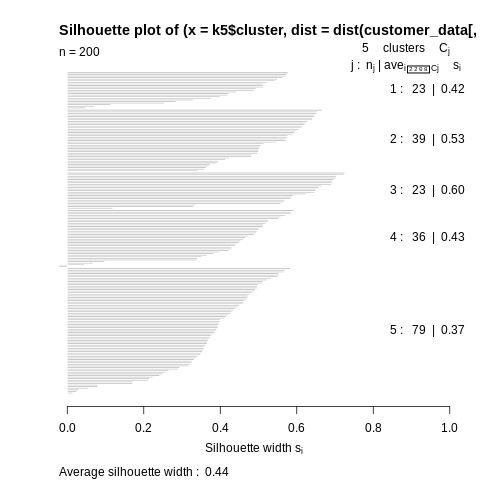

In [ ]:
%%R
k5<-kmeans(customer_data[,3:5],5,iter.max=100,nstart=50,algorithm="Lloyd")
s5<-plot(silhouette(k5$cluster,dist(customer_data[,3:5],"euclidean")))

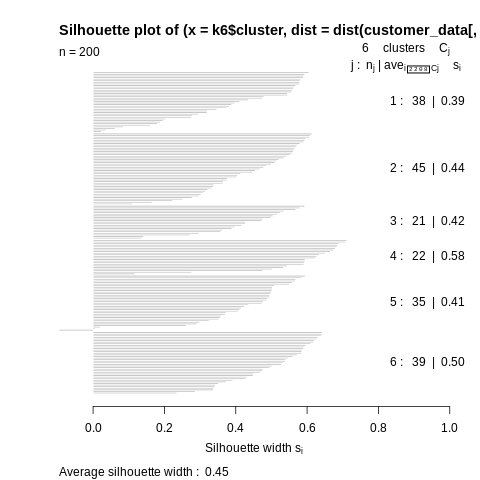

In [ ]:
%%R
k6<-kmeans(customer_data[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
s6<-plot(silhouette(k6$cluster,dist(customer_data[,3:5],"euclidean")))

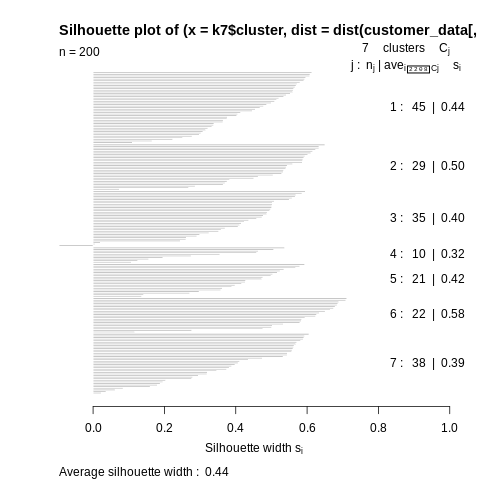

In [ ]:
%%R
k7<-kmeans(customer_data[,3:5],7,iter.max=100,nstart=50,algorithm="Lloyd")
s7<-plot(silhouette(k7$cluster,dist(customer_data[,3:5],"euclidean")))

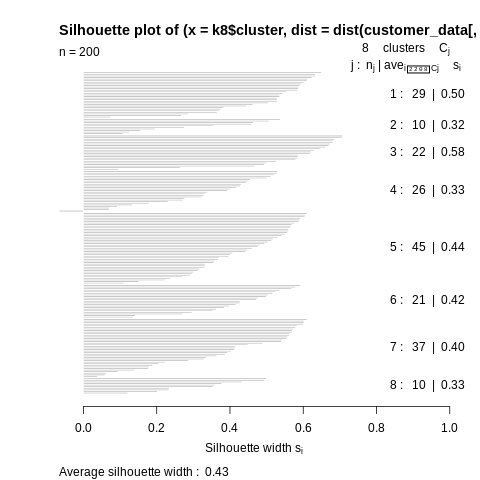

In [ ]:
%%R
k8<-kmeans(customer_data[,3:5],8,iter.max=100,nstart=50,algorithm="Lloyd")
s8<-plot(silhouette(k8$cluster,dist(customer_data[,3:5],"euclidean")))

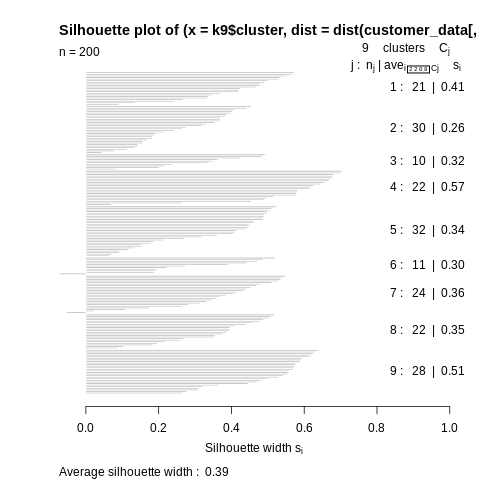

In [ ]:
%%R
k9<-kmeans(customer_data[,3:5],9,iter.max=100,nstart=50,algorithm="Lloyd")
s9<-plot(silhouette(k9$cluster,dist(customer_data[,3:5],"euclidean")))

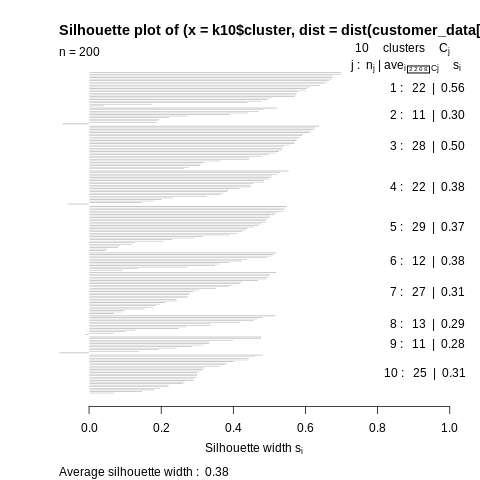

In [ ]:
%%R
k10<-kmeans(customer_data[,3:5],10,iter.max=100,nstart=50,algorithm="Lloyd")
s10<-plot(silhouette(k10$cluster,dist(customer_data[,3:5],"euclidean")))

In [ ]:
%%R
install.packages("NbClust")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpcMCtRc/downloaded_packages’



In [ ]:
%%R
install.packages("factoextra")

(as ‘lib’ is unspecified)






















































































































































































































	‘/tmp/RtmpcMCtRc/downloaded_packages’



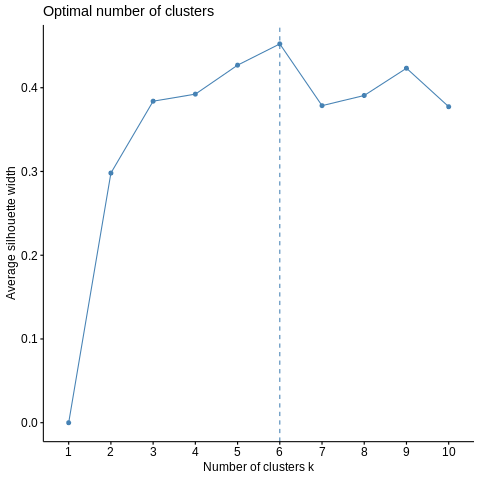

In [ ]:
%%R
library(NbClust)
library(factoextra)

fviz_nbclust(customer_data[,3:5], kmeans, method = "silhouette")

**Gap Statistic Method**

Clustering k = 1,2,..., K.max (= 10): .. done
Bootstrapping, b = 1,2,..., B (= 50)  [one "." per sample]:
.................................................. 50 


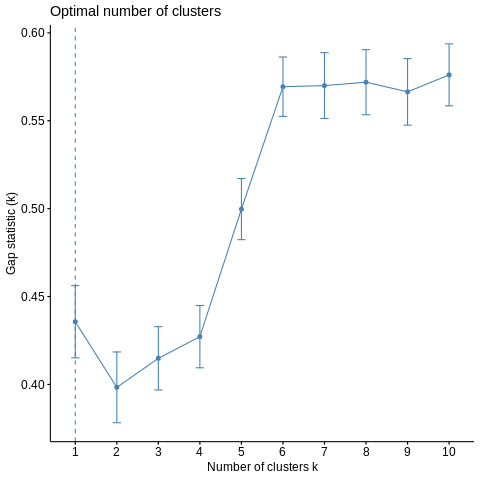

In [ ]:
%%R
library(NbClust)
library(factoextra)
set.seed(125)
stat_gap <- clusGap(customer_data[,3:5], FUN = kmeans, nstart = 25, K.max = 10, B = 50)
fviz_gap_stat(stat_gap)

In [ ]:
%%R
pcclust=prcomp(customer_data[,3:5],scale=FALSE) #principal component analysis
summary(pcclust)

pcclust$rotation[,1:2]

                              PC1        PC2
Age                     0.1889742 -0.1309652
Annual.Income..k..     -0.5886410 -0.8083757
Spending.Score..1.100. -0.7859965  0.5739136


In [ ]:
%%R
k6<-kmeans(customer_data[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
k6

K-means clustering with 6 clusters of sizes 45, 21, 35, 39, 38, 22

Cluster means:
       Age Annual.Income..k.. Spending.Score..1.100.
1 56.15556           53.37778               49.08889
2 44.14286           25.14286               19.52381
3 41.68571           88.22857               17.28571
4 32.69231           86.53846               82.12821
5 27.00000           56.65789               49.13158
6 25.27273           25.72727               79.36364

Clustering vector:
  [1] 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2
 [38] 6 2 6 1 6 1 5 2 6 1 5 5 5 1 5 5 1 1 1 1 1 5 1 1 5 1 1 1 5 1 1 5 5 1 1 1 1
 [75] 1 5 1 5 5 1 1 5 1 1 5 1 1 5 5 1 1 5 1 5 5 5 1 5 1 5 5 1 1 5 1 5 1 1 1 1 1
[112] 5 5 5 5 5 1 1 1 1 5 5 5 4 5 4 3 4 3 4 3 4 5 4 3 4 3 4 3 4 3 4 5 4 3 4 3 4
[149] 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
[186] 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4

Within cluster sum of squares by cluster:
[1]  8062.133  7732.381 16690.857 13972.359  77

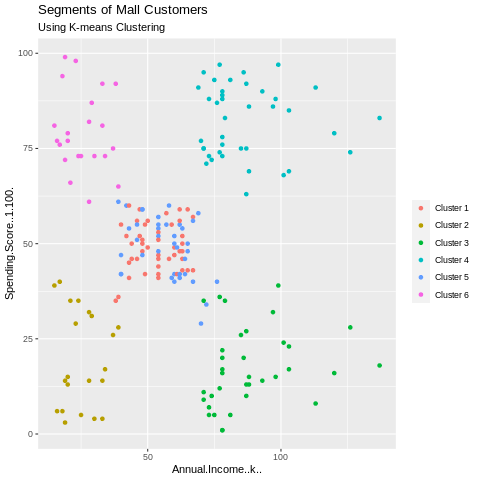

In [ ]:
%%R
set.seed(1)
ggplot(customer_data, aes(x =Annual.Income..k.., y = Spending.Score..1.100.)) +
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
              breaks=c("1", "2", "3", "4", "5","6"),
              labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

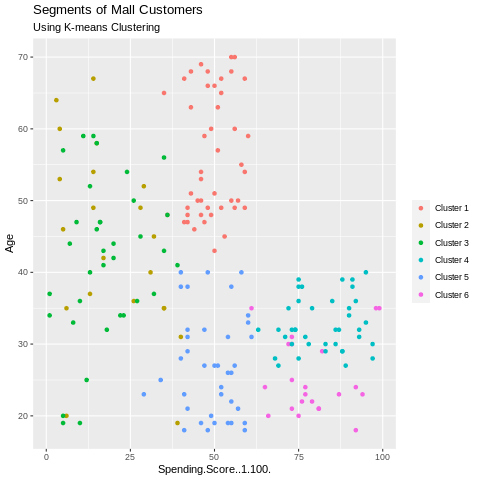

In [ ]:
%%R
ggplot(customer_data, aes(x =Spending.Score..1.100., y =Age)) +
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
                      breaks=c("1", "2", "3", "4", "5","6"),
                      labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

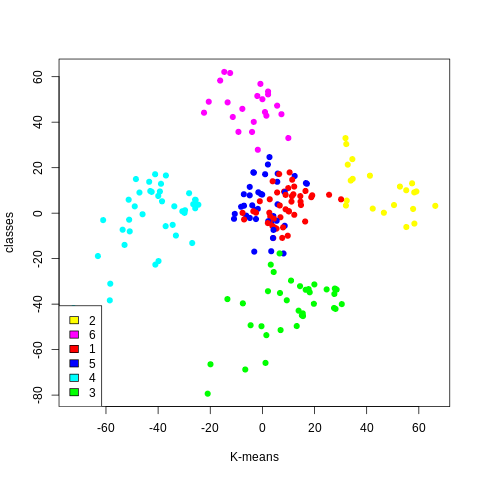

In [ ]:
%%R
kCols=function(vec){cols=rainbow (length (unique (vec)))
return (cols[as.numeric(as.factor(vec))])}

digCluster<-k6$cluster; dignm<-as.character(digCluster); # K-means clusters

plot(pcclust$x[,1:2], col =kCols(digCluster),pch =19,xlab ="K-means",ylab="classes")
legend("bottomleft",unique(dignm),fill=unique(kCols(digCluster)))